# Práctica 1: Limpieza de Datos

Para esta primera práctica, se realiza la limpieza de los datos, utilizando técnicas de outliers, estandarización y one-hot encoding.

## Librerías

Se importan las librerías necesarias para la limpieza de los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## Importación de los datos desde CSV

Se crea una copia del dataset original para manejarlo y relizar la limpieza en esta copia.

In [2]:
# Se carga el conjunto de datos original.
df_original = pd.read_csv("C:\\Users\\Paty-\\OneDrive\\Documentos\\04 Facultad\\Séptimo Semestre\\Minería de Datos\\CardiovascularDiseaseDataMining\\DatasetOriginal\\cardiovascular_disease.csv", sep=";")

# Se crea una copia del conjunto de datos original para trabajar en ella.
df = df_original.copy()

# Se muestran las primeras filas del conjunto de datos.
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Transformar la edad de días a fecha

Para cumplir con el requisito de la variable de tipo datetime, se toma la edad del paciente, la cual está en días.

Se considera como fecha de recolección hace 7 años debido a la publicación del dataset, y se obtiene la fecha de nacimiento del paciente, además de transformar la propia edad de días a años.

In [3]:
# Se obtiene la fecha actual para tomar referencia.
fecha_actual = pd.to_datetime("today")

# Se considera la fecha de recolección de datos como hace 7 años.
fecha_recoleccion = fecha_actual - pd.DateOffset(years=7)

# Se calcula la fecha de nacimiento restando la edad en días a la fecha de recolección.
df["birth_date"] = fecha_recoleccion - pd.to_timedelta(df["age"], unit="D")

# Se calcula la edad al momento de la recolección restando la fecha de nacimiento a la fecha de recolección y convirtiendo el resultado a años.
df["age"] = ((fecha_recoleccion - df["birth_date"]).dt.days / 365.25).astype(int)

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,birth_date
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,1968-10-13 13:09:03.928010
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1963-10-05 13:09:03.928010
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,1967-07-07 13:09:03.928010
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1970-11-22 13:09:03.928010
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,1971-04-20 13:09:03.928010


## Visualización de valores nulos

Se busca visualizar la cantidad de valores nulos por fila, para en caso de encontrarlos, eliminar los registros.

In [4]:
# Muestra la cantidad de datos nulos por fila.
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
birth_date     0
dtype: int64

## Revisar si hay elementos duplicados

Se verifica si existe algún elemento duplicado para eliminarlo en caso de que exista.

In [5]:
# Se revisa si hay elementos duplicados.
df.duplicated().any()

np.False_

## Detección y tratamiento de valores atípicos

#### Cantidad de datos antes de las modificaciones

Se cuenta la cantidad de registros para las columnas, para así saber cuántos registros se eliminan después de los outliers.

In [6]:
df.count()

id             70000
age            70000
gender         70000
height         70000
weight         70000
ap_hi          70000
ap_lo          70000
cholesterol    70000
gluc           70000
smoke          70000
alco           70000
active         70000
cardio         70000
birth_date     70000
dtype: int64

#### Boxplot y límites para valores atípicos

Se verifica la cantidad de outliers, contándolos y también mostrándolos en un gráfico.


*** Columna: age ***


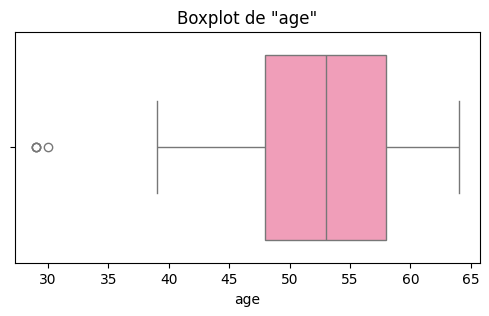

	- Outliers en la columna "age": 4



*** Columna: height ***


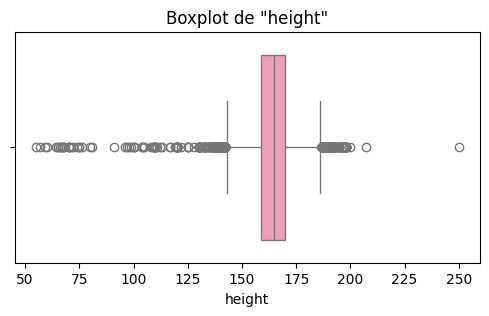

	- Outliers en la columna "height": 519



*** Columna: weight ***


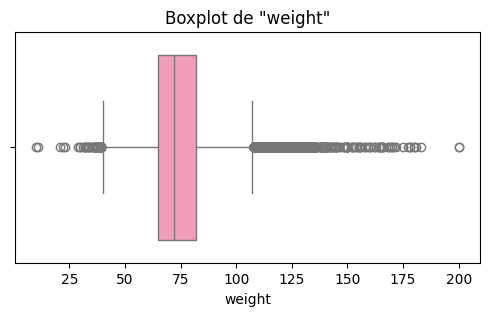

	- Outliers en la columna "weight": 1758



*** Columna: ap_hi ***


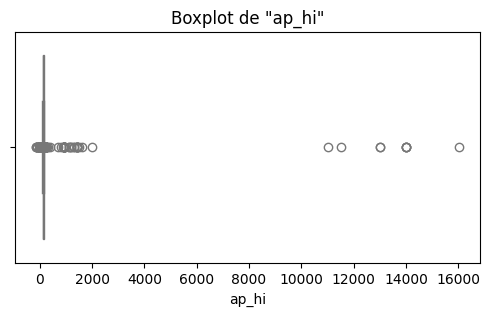

	- Outliers en la columna "ap_hi": 1309



*** Columna: ap_lo ***


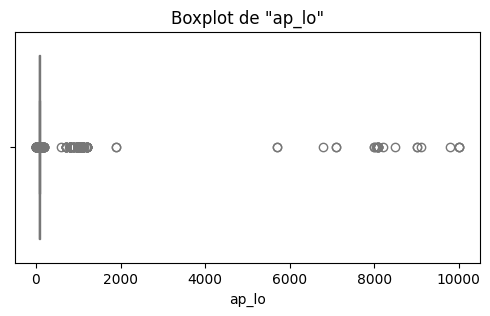

	- Outliers en la columna "ap_lo": 3908


----- Visión de boxplots después de la eliminación de outliers -----

*** Columna: age ***


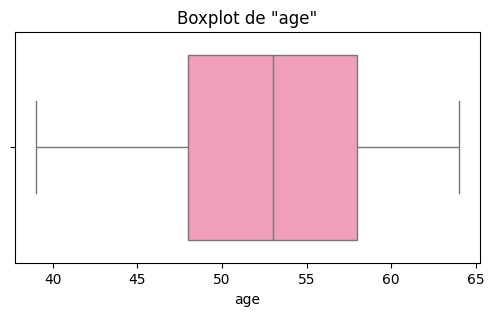

	- Outliers en la columna "age": 0



*** Columna: height ***


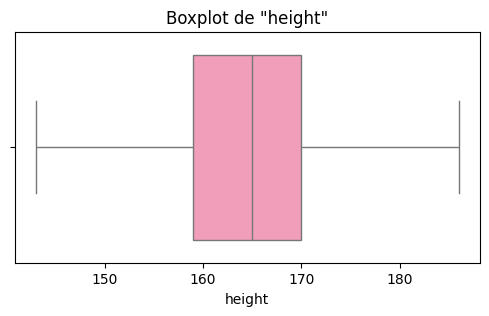

	- Outliers en la columna "height": 0



*** Columna: weight ***


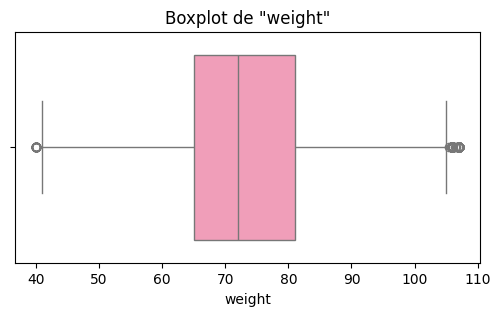

	- Outliers en la columna "weight": 263



*** Columna: ap_hi ***


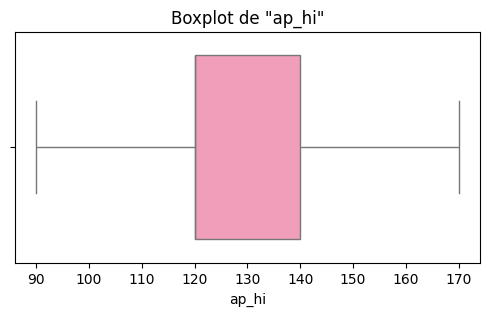

	- Outliers en la columna "ap_hi": 0



*** Columna: ap_lo ***


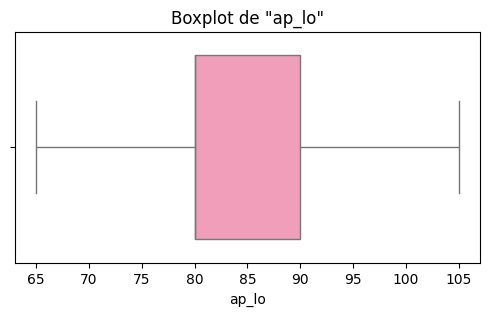

	- Outliers en la columna "ap_lo": 0




In [7]:
columnas_numericas = ["age", "height", "weight", "ap_hi", "ap_lo"]

# Diccionario para guardar los outliers de cada variable.
outliers_por_columna = {}

for col in columnas_numericas:
    print(f"\n*** Columna: {col} ***")
    
    # Boxplot para ver valores atípicos.
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#fd91b5')
    plt.title(f'Boxplot de "{col}"')
    plt.show()
    
    # Se hace el cálculo de los cuantiles y el IQR.
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Se calculan los límites para los valores.
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Se identifican los valores atípicos en la columna.
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    df = df[(df[col] >= limite_inferior) & (df[col] <= limite_superior)]
    
    # Se guardan los resultados.
    outliers_por_columna[col] = outliers
    
    print(f"\t- Outliers en la columna \"{col}\": {len(outliers)}\n\n")

# Se comprueba que no haya más outliers.
print("----- Visión de boxplots después de la eliminación de outliers -----")

for col in columnas_numericas:
    print(f"\n*** Columna: {col} ***")
    
    # Boxplot para ver valores atípicos.
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col], color='#fd91b5')
    plt.title(f'Boxplot de "{col}"')
    plt.show()
    
    # Se hace el cálculo de los cuantiles y el IQR.
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Se calculan los límites para los valores.
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    # Se identifican los valores atípicos en la columna.
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]
    
    # Se guardan los resultados.
    outliers_por_columna[col] = outliers
    
    print(f"\t- Outliers en la columna \"{col}\": {len(outliers)}\n\n")

#### Cantidad de datos después de las modificaciones

Se verifica de nuevo la cantidad de registros tras las modificaciones.

In [8]:
df.count()

id             62502
age            62502
gender         62502
height         62502
weight         62502
ap_hi          62502
ap_lo          62502
cholesterol    62502
gluc           62502
smoke          62502
alco           62502
active         62502
cardio         62502
birth_date     62502
dtype: int64

#### Estandarización de los datos numéricos

Se estandarizan las columnas numéricas para evitar resultados atípicos a la hora de hacer comparaciones.

In [9]:
# Se crea el objeto de estandarización.
scaler = StandardScaler()

for col in columnas_numericas:
    # Se aplica la estandarización a la columna y se guarda en una nueva columna.
    df[col + '_scaled'] = scaler.fit_transform(df[[col]])

df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,birth_date,age_scaled,height_scaled,weight_scaled,ap_hi_scaled,ap_lo_scaled
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,1968-10-13 13:09:03.928010,-0.426244,0.477190,-0.911143,-1.149090,-0.221435
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,1963-10-05 13:09:03.928010,0.315922,-1.116157,0.963057,0.950300,1.081779
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,1967-07-07 13:09:03.928010,-0.277811,0.078853,-0.748169,0.250504,-1.524649
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,1970-11-22 13:09:03.928010,-0.723111,0.609969,0.718596,1.650097,2.384993
5,8,59,1,151,67.0,120,80,2,2,0,0,0,0,1959-02-22 13:09:03.928010,0.909656,-1.780052,-0.503708,-0.449293,-0.221435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,1,172,70.0,130,90,1,1,0,0,1,1,1965-03-17 13:09:03.928010,0.019056,1.008306,-0.259247,0.250504,1.081779
69994,99992,57,1,165,80.0,150,80,1,1,0,0,1,1,1961-06-11 13:09:03.928010,0.612789,0.078853,0.555623,1.650097,-0.221435
69995,99993,52,2,168,76.0,120,80,1,1,1,0,1,0,1966-06-19 13:09:03.928010,-0.129377,0.477190,0.229675,-0.449293,-0.221435
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,1957-09-23 13:09:03.928010,1.206522,-0.186705,-0.096273,0.600402,-0.221435


## Codificación de variables categóricas

Se realiza el mapeado de las columnas categóricas para tener mayor claridad.

In [10]:
columnas_categoricas = ["gender", "cholesterol", "gluc", "smoke", "alco", "active", "cardio"]

df["gender"] = df["gender"].map({1: "Female", 2: "Male"})
df["cholesterol"] = df["cholesterol"].map({1: "Normal", 2: "Above Normal", 3: "Well Above Normal"})
df["gluc"] = df["gluc"].map({1: "Normal", 2: "Above Normal", 3: "Well Above Normal"})
df["smoke"] = df["smoke"].map({0: "No", 1: "Yes"})
df["alco"] = df["alco"].map({0: "No", 1: "Yes"})
df["active"] = df["active"].map({0: "No", 1: "Yes"})
df["cardio"] = df["cardio"].map({0: "No", 1: "Yes"})

for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df[col].unique())


Columna: gender
['Male' 'Female']

Columna: cholesterol
['Normal' 'Well Above Normal' 'Above Normal']

Columna: gluc
['Normal' 'Above Normal' 'Well Above Normal']

Columna: smoke
['No' 'Yes']

Columna: alco
['No' 'Yes']

Columna: active
['Yes' 'No']

Columna: cardio
['No' 'Yes']


## Visualización del dataset limpio

Verificamos el formato del dataset antes de crear el nuevo archivo limpio.

In [11]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,birth_date,age_scaled,height_scaled,weight_scaled,ap_hi_scaled,ap_lo_scaled
0,0,50,Male,168,62.0,110,80,Normal,Normal,No,No,Yes,No,1968-10-13 13:09:03.928010,-0.426244,0.477190,-0.911143,-1.149090,-0.221435
1,1,55,Female,156,85.0,140,90,Well Above Normal,Normal,No,No,Yes,Yes,1963-10-05 13:09:03.928010,0.315922,-1.116157,0.963057,0.950300,1.081779
2,2,51,Female,165,64.0,130,70,Well Above Normal,Normal,No,No,No,Yes,1967-07-07 13:09:03.928010,-0.277811,0.078853,-0.748169,0.250504,-1.524649
3,3,48,Male,169,82.0,150,100,Normal,Normal,No,No,Yes,Yes,1970-11-22 13:09:03.928010,-0.723111,0.609969,0.718596,1.650097,2.384993
5,8,59,Female,151,67.0,120,80,Above Normal,Above Normal,No,No,No,No,1959-02-22 13:09:03.928010,0.909656,-1.780052,-0.503708,-0.449293,-0.221435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,53,Female,172,70.0,130,90,Normal,Normal,No,No,Yes,Yes,1965-03-17 13:09:03.928010,0.019056,1.008306,-0.259247,0.250504,1.081779
69994,99992,57,Female,165,80.0,150,80,Normal,Normal,No,No,Yes,Yes,1961-06-11 13:09:03.928010,0.612789,0.078853,0.555623,1.650097,-0.221435
69995,99993,52,Male,168,76.0,120,80,Normal,Normal,Yes,No,Yes,No,1966-06-19 13:09:03.928010,-0.129377,0.477190,0.229675,-0.449293,-0.221435
69998,99998,61,Female,163,72.0,135,80,Normal,Above Normal,No,No,No,Yes,1957-09-23 13:09:03.928010,1.206522,-0.186705,-0.096273,0.600402,-0.221435


## Guardado de los datos limpios

Se guarda el datset modificado y limpio.

In [12]:
df.to_csv("cardiovascular_disease_cleaned.csv", index=False)